# Insurance Premim Prediction

The goal of this project is to give people an estimate of how much they need based on
their individual health situation. After that, customers can work with any health 
insurance carrier and its plans and perks while keeping the projected cost from our 
study in mind. This can assist a person in concentrating on the health side of an 
insurance policy rather than the ineffective part.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LinearRegression, Ridge
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("insurance.csv")

In [4]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [5]:
data.shape

(1338, 7)

In [6]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [7]:
data.dtypes=='O'

age         False
sex          True
bmi         False
children    False
smoker       True
region       True
expenses    False
dtype: bool

In [8]:
cat_data = data.select_dtypes(include="object")
cat_data.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [9]:
num_data = data.select_dtypes(exclude="object")
num_data.head()

,age,bmi,children,expenses
0,19,27.9,0,16884.92
1,18,33.8,1,1725.55
2,28,33.0,3,4449.46
3,33,22.7,0,21984.47
4,32,28.9,0,3866.86


In [10]:
print("Categorical Columns are:\n", cat_data.columns)
print("\nNumerical Columns are:\n", num_data.columns)

Categorical Columns are:
 Index(['sex', 'smoker', 'region'], dtype='object')

Numerical Columns are:
 Index(['age', 'bmi', 'children', 'expenses'], dtype='object')


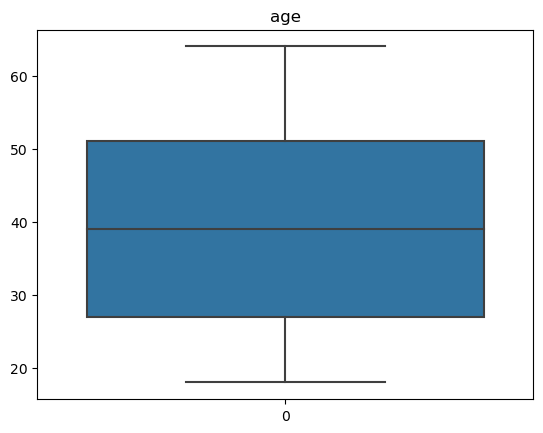

---------------------------------------------------


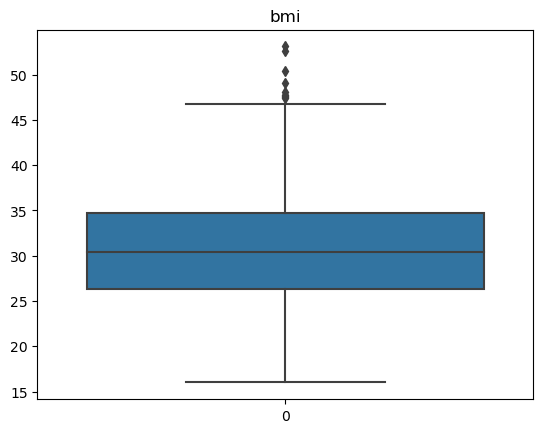

---------------------------------------------------


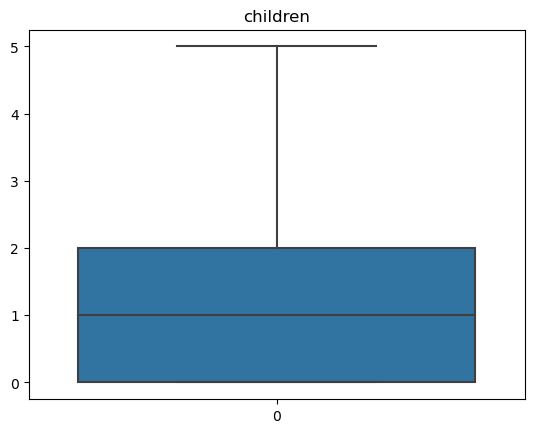

---------------------------------------------------


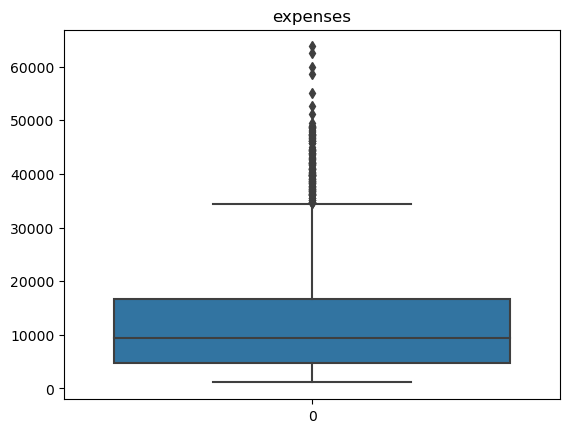

---------------------------------------------------


In [11]:
#Outliers
for feature in num_data.columns:
    plt.title(feature)
    sns.boxplot(data[feature])
    plt.show()
    print("---------------------------------------------------")

In [12]:
##Find unique label & value counts in categrocal data
def unique_lables(data):
    for i in data.columns:
        lables = data[i].unique().tolist()
        counts = data[i].value_counts()
        print(f"Unique Lables in {i}:\n", lables)
        print(f"\n Value Counts of {i}:\n", counts)
        print("---------------------------------------------------------\n")

In [13]:
unique_lables(cat_data)

Unique Lables in sex:
 ['female', 'male']

 Value Counts of sex:
 sex
male      676
female    662
Name: count, dtype: int64
---------------------------------------------------------

Unique Lables in smoker:
 ['yes', 'no']

 Value Counts of smoker:
 smoker
no     1064
yes     274
Name: count, dtype: int64
---------------------------------------------------------

Unique Lables in region:
 ['southwest', 'southeast', 'northwest', 'northeast']

 Value Counts of region:
 region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64
---------------------------------------------------------



In [14]:
##Check distribution of numerical data
def show_hist(data):
    for i in data.columns:
        plt.figure(figsize=(6,5))
        plt.title(f"Distribution of {i}")
        plt.hist(data[i], bins=10, density=True, edgecolor="black", color="gray")
        data[i].plot(kind= 'kde', color= 'red')
        plt.show()

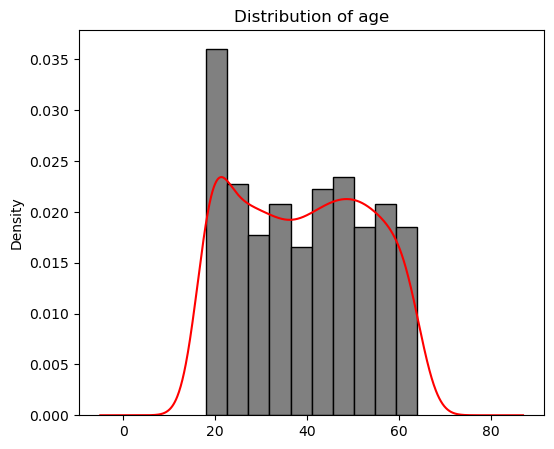

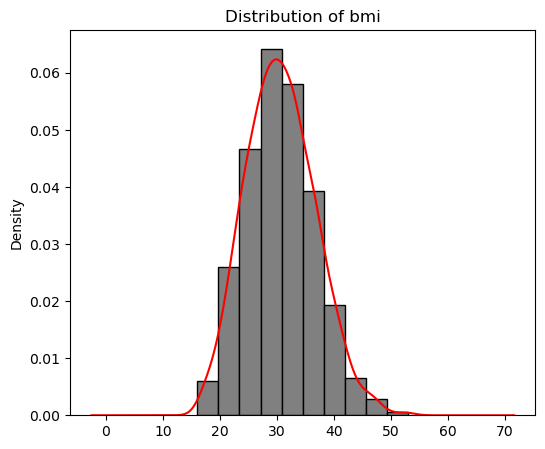

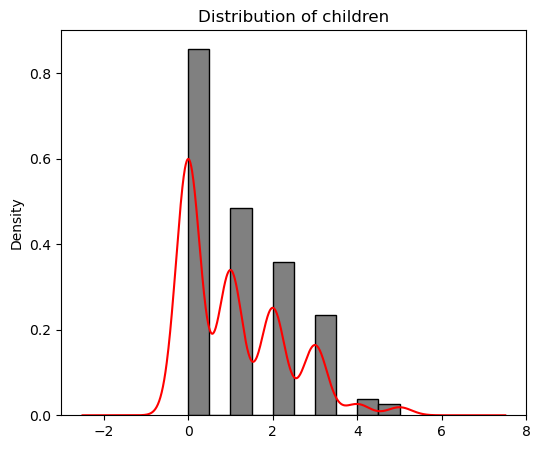

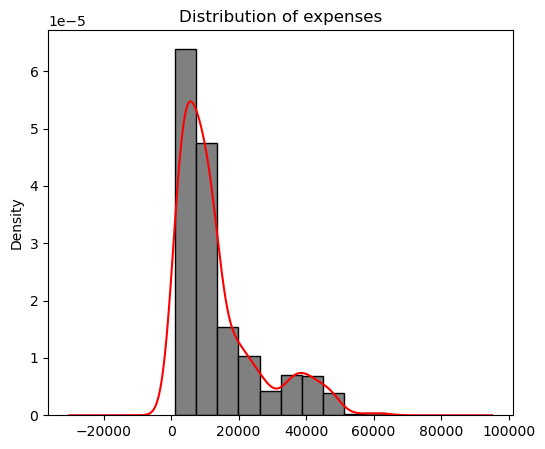

In [15]:
show_hist(num_data)

In [16]:
##Check counts of categorical data column lables
def counts_plot(data):
    for i in data.columns: 
        plt.figure(figsize=(4,3))
        plt.title(f"Count plot of {i}")
        sns.countplot(data, x= i)
        plt.show()

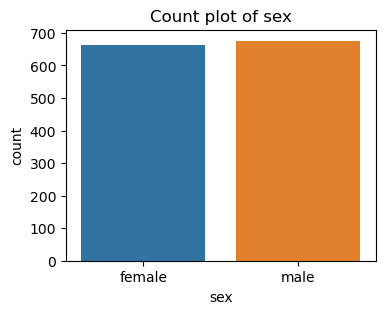

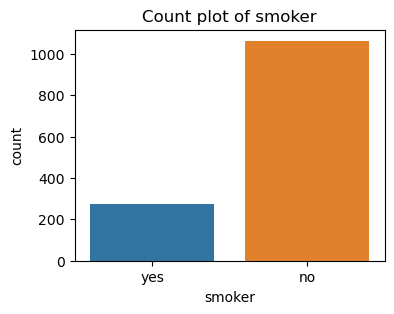

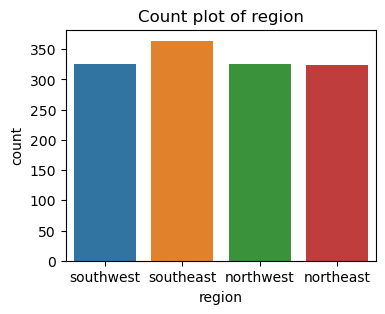

In [17]:
counts_plot(cat_data)

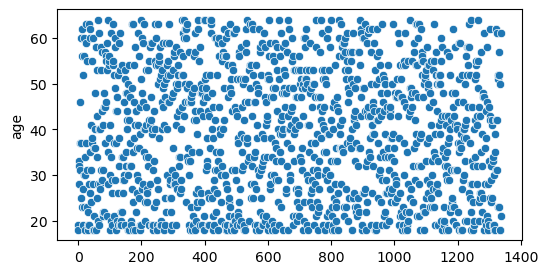

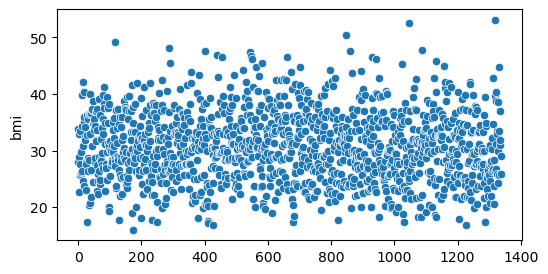

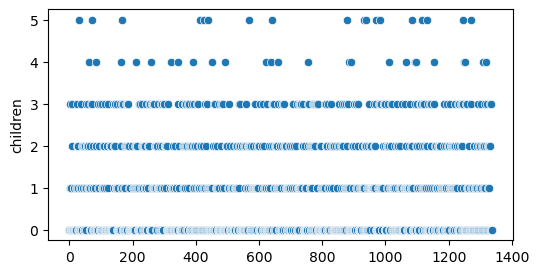

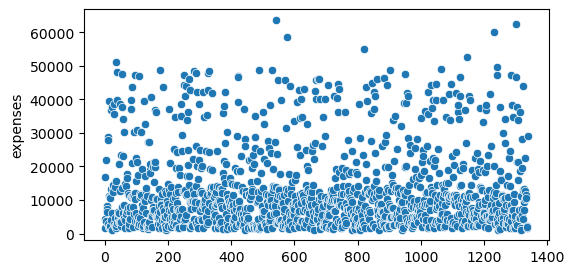

In [18]:
#How data is scattered
for i in num_data.columns:
    plt.figure(figsize=(6,3))
    sns.scatterplot(num_data[i])
    plt.show()

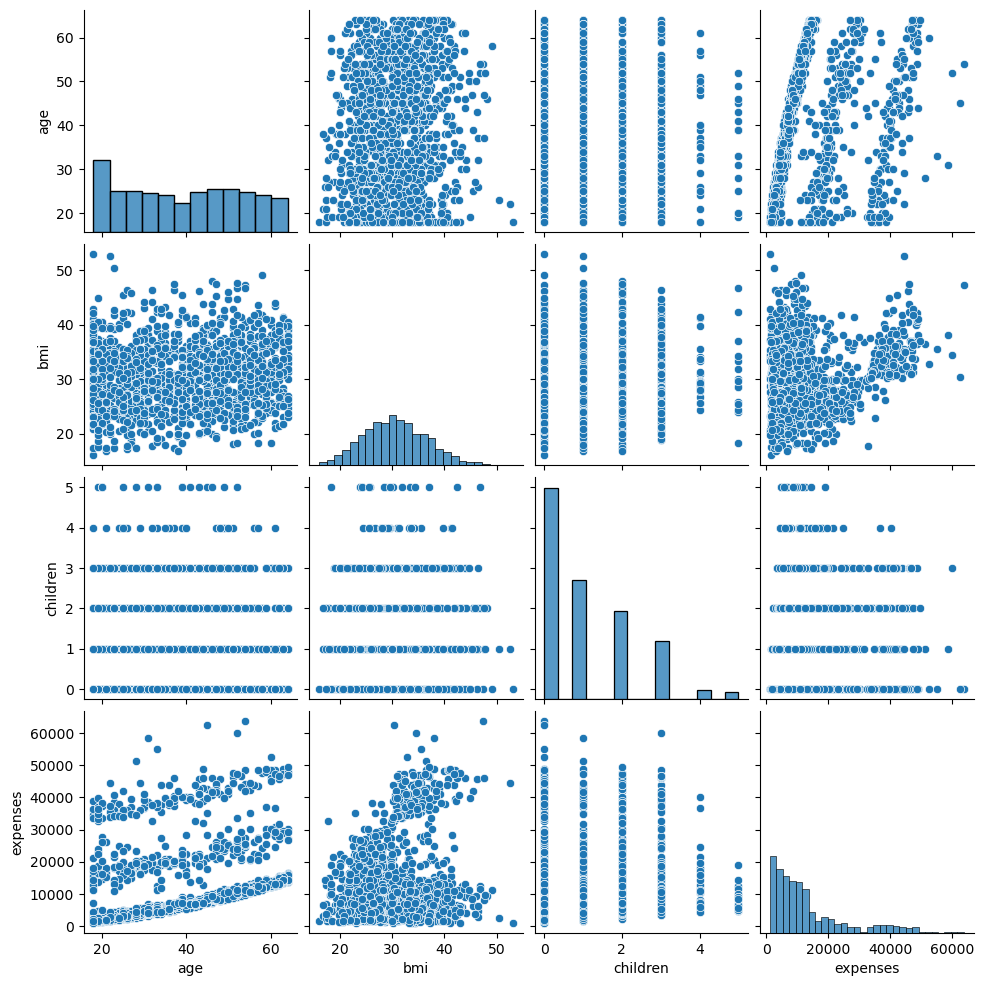

In [19]:
## Relation between the features
sns.pairplot(num_data)
plt.show()

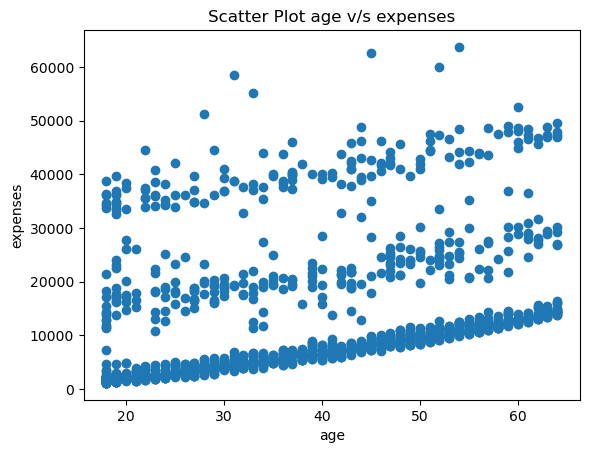

In [20]:
plt.scatter("age", "expenses", data=data)

# Add labels and title
plt.xlabel('age')
plt.ylabel("expenses")
plt.title('Scatter Plot age v/s expenses')

# Display the plot
plt.show()

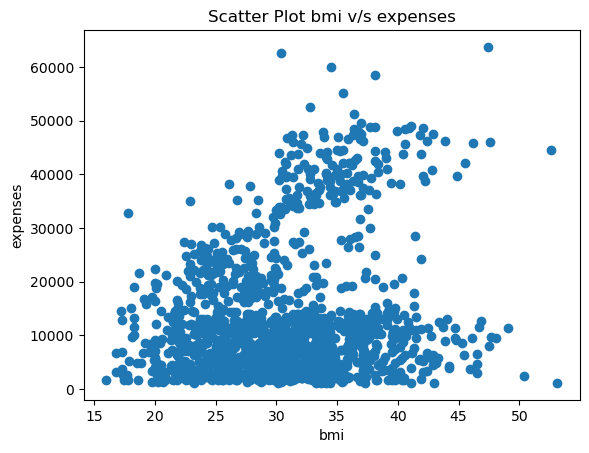

In [21]:
plt.scatter("bmi", "expenses", data=data)

# Add labels and title
plt.xlabel('bmi')
plt.ylabel("expenses")
plt.title('Scatter Plot bmi v/s expenses')

# Display the plot
plt.show()

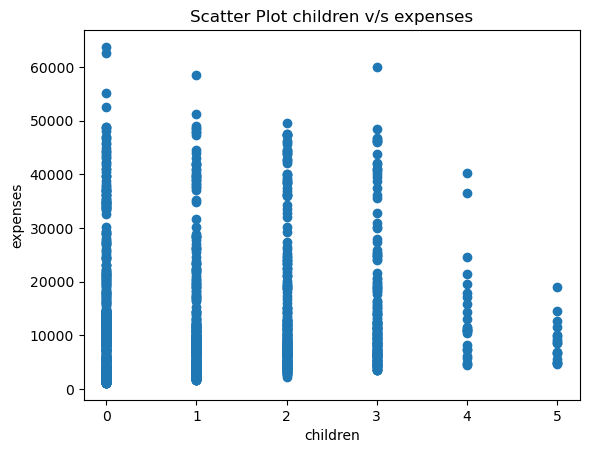

In [22]:
plt.scatter("children", "expenses", data=data)

# Add labels and title
plt.xlabel('children')
plt.ylabel("expenses")
plt.title('Scatter Plot children v/s expenses')

# Display the plot
plt.show()

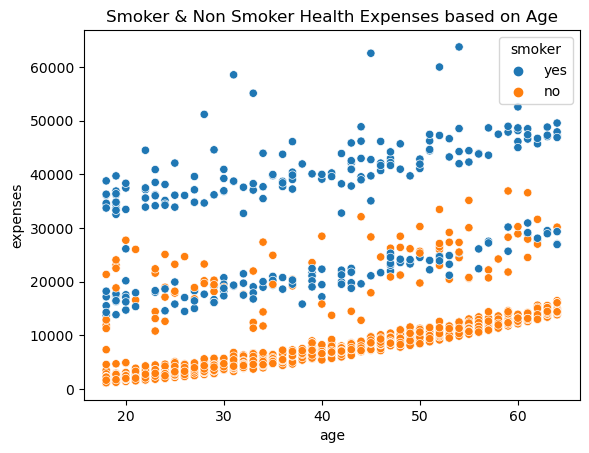

In [23]:
sns.scatterplot(x='age', y='expenses', hue='smoker', data=data)
plt.title("Smoker & Non Smoker Health Expenses based on Age")
plt.show()

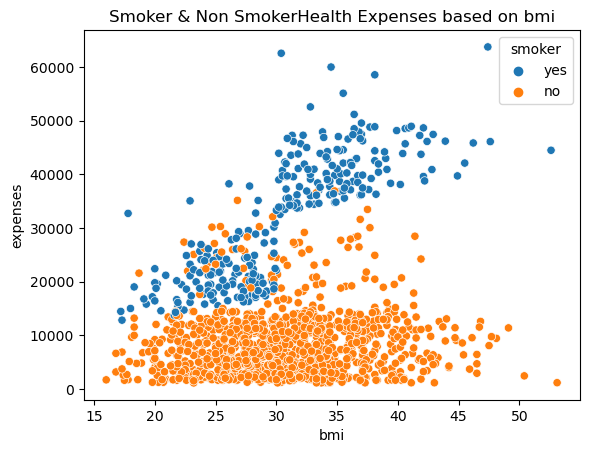

In [24]:
sns.scatterplot(x='bmi', y='expenses', hue='smoker', data=data)
plt.title("Smoker & Non SmokerHealth Expenses based on bmi")
plt.show()

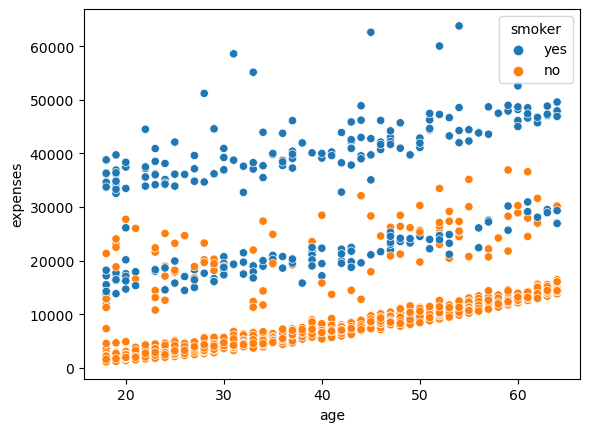

In [25]:
sns.scatterplot(x='age', y='expenses', hue='smoker', data=data)
plt.show()

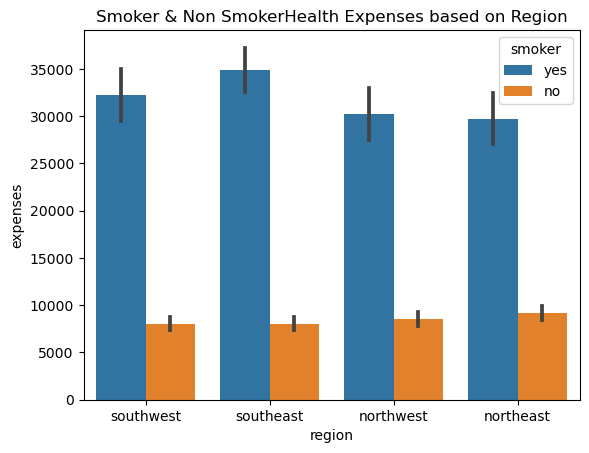

In [26]:
sns.barplot(x='region', y='expenses', hue='smoker', data=data)
plt.title('Smoker & Non SmokerHealth Expenses based on Region')
plt.show()

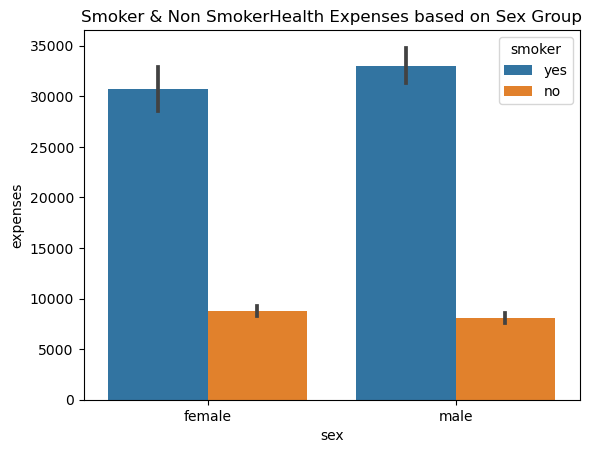

In [27]:
sns.barplot(x='sex', y='expenses', hue='smoker', data=data)
plt.title('Smoker & Non SmokerHealth Expenses based on Sex Group')
plt.show()

In [28]:
##Check mean, mode, median& percentiles of the data
num_data.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [29]:
#Counts & mode of the categorical data
cat_data.describe()

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [30]:
#Correlation between features
num_data.corr()

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


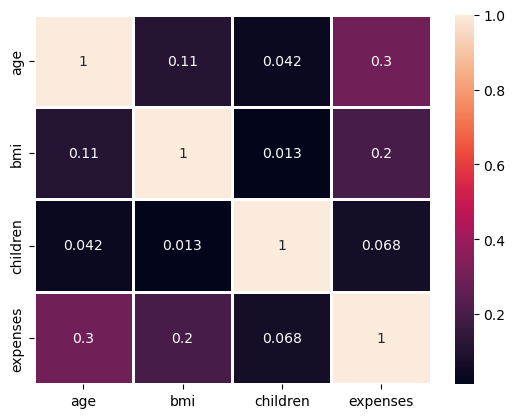

In [31]:
sns.heatmap(num_data.corr(), annot=True, linewidths=1)
plt.show()

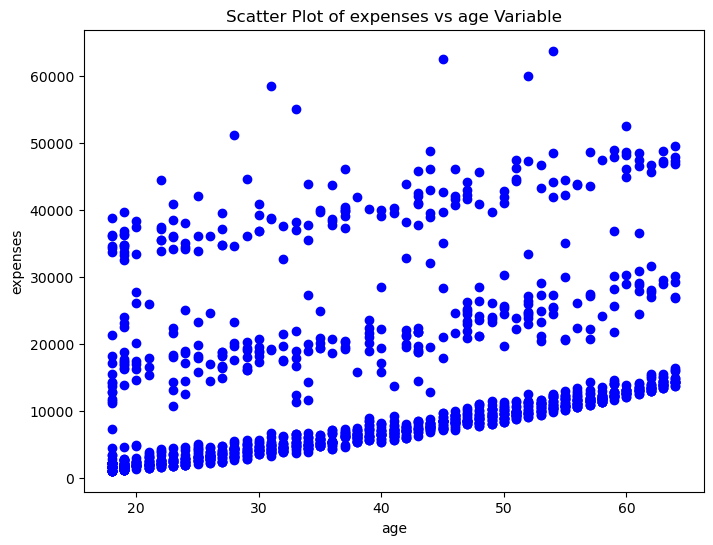

In [32]:
#Relation between targewt varibale & features
plt.figure(figsize=(8, 6))
plt.scatter(data["age"], data['expenses'], color = 'blue', label='Data points')
plt.title('Scatter Plot of expenses vs age Variable')
plt.xlabel('age')
plt.ylabel('expenses')
plt.show()

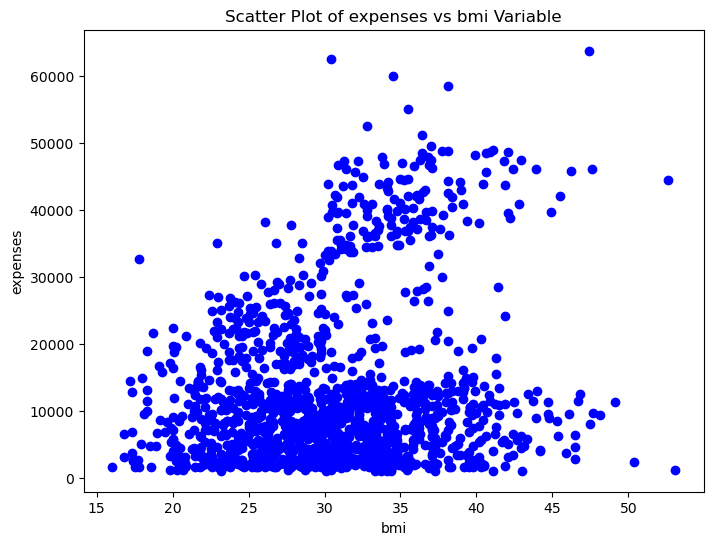

In [33]:
plt.figure(figsize=(8, 6))
plt.scatter(data["bmi"], data['expenses'], color = 'blue', label='Data points')
plt.title('Scatter Plot of expenses vs bmi Variable')
plt.xlabel('bmi')
plt.ylabel('expenses')
plt.show()

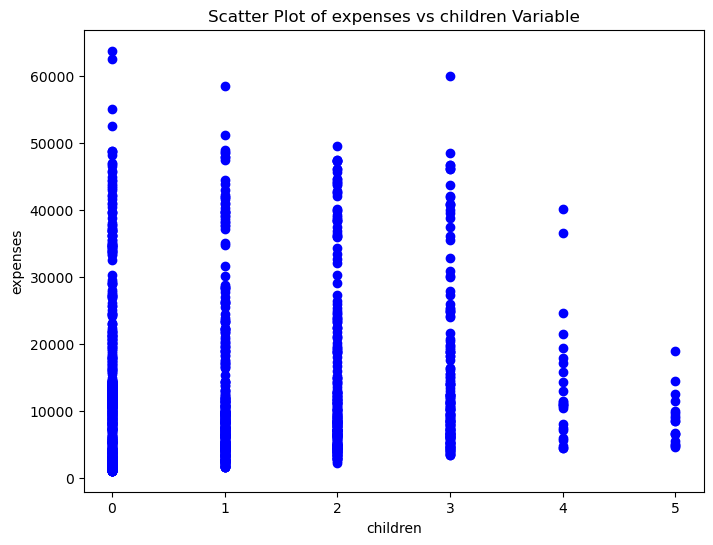

In [34]:
plt.figure(figsize=(8, 6))
plt.scatter(data["children"], data['expenses'], color = 'blue', label='Data points')
plt.title('Scatter Plot of expenses vs children Variable')
plt.xlabel('children')
plt.ylabel('expenses')
plt.show()

In [35]:
cat_data.columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [36]:
#relation between target varibale & categorical feature
sex_with_expenses = pd.pivot_table(data, values="expenses", index= "sex", aggfunc='sum')
sex_with_expenses

,expenses
sex,
female,8321061.23
male,9434763.96


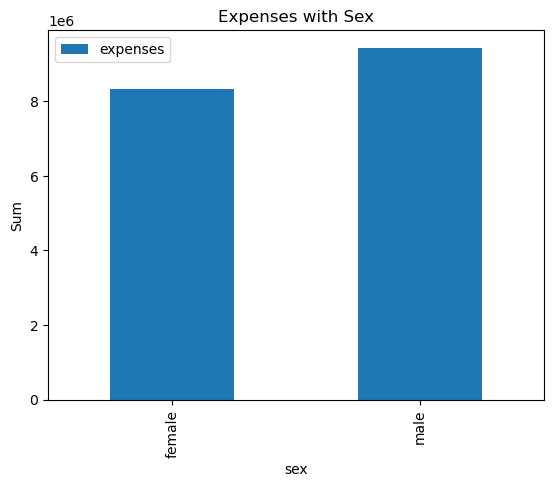

In [37]:
sex_with_expenses.plot(kind= 'bar')
plt.title('Expenses with Sex')
plt.ylabel('Sum')
plt.show()

In [38]:
smoker_with_expenses = pd.pivot_table(data, values="expenses", index= "smoker", aggfunc='sum')
smoker_with_expenses

,expenses
smoker,
no,8974061.63
yes,8781763.56


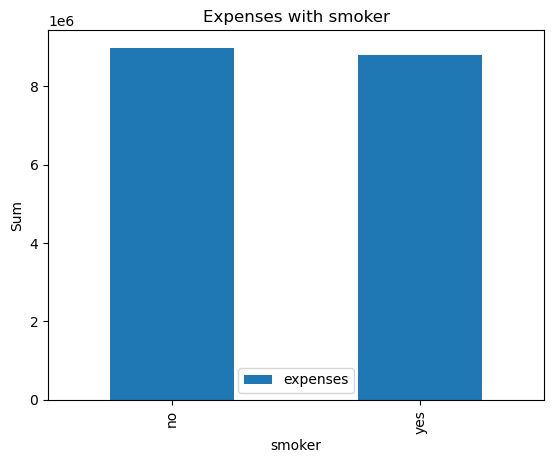

In [39]:
smoker_with_expenses.plot(kind= 'bar')
plt.title('Expenses with smoker')
plt.ylabel('Sum')
plt.show()

In [40]:
region_with_expenses = pd.pivot_table(data, values="expenses", index= "region", aggfunc='sum')
region_with_expenses

,expenses
region,
northeast,4343668.64
northwest,4035711.93
southeast,5363689.80
southwest,4012754.82


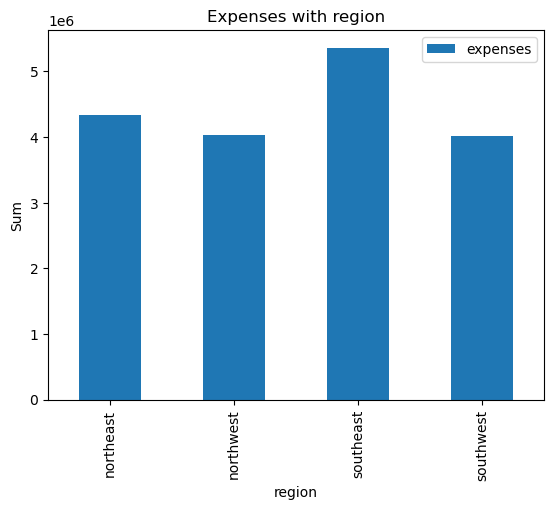

In [41]:
region_with_expenses.plot(kind= 'bar')
plt.title('Expenses with region')
plt.ylabel('Sum')
plt.show()

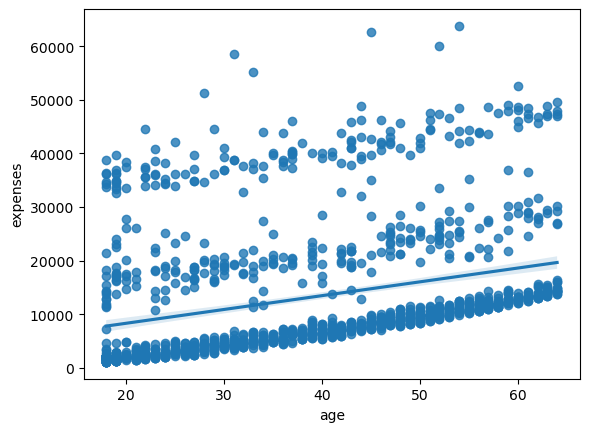

In [42]:
# How each feature can create best fit line & how error can occur
sns.regplot(data, x="age" , y="expenses")
plt.show()

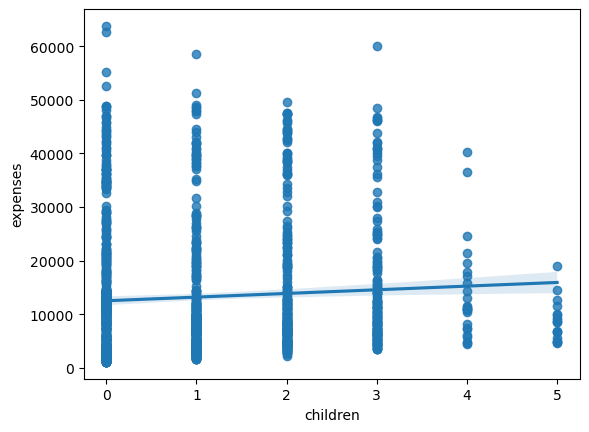

In [43]:
sns.regplot(data, x="children" , y="expenses")
plt.show()

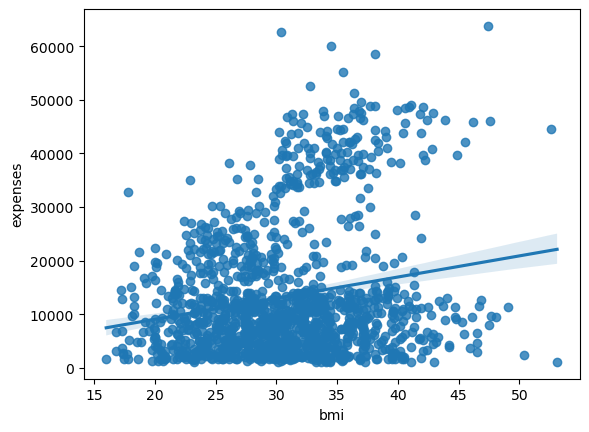

In [44]:
sns.regplot(data, x="bmi" , y="expenses")
plt.show()

#Lets' Change BMI column tocategorical as per health nature

Who are bmi having,

* 18.4 or less : Underweight
* 18.5–24.9 : Healthful weight
* 25.0–29.9 : Overweight - Increased risk
* 30.0–34.9 : ObesityHighrisk - High risk
* 35.0–39.9 : ObesityVeryhighrisk - Very high risk
* 40.0 or 40.0+ : ExtremeObesity - Extremely high risk

In [45]:
# Define the bins and labels
bmi_bins = [0.00 ,18.5, 25.0 , 30.0, 35.0, 40.0, 70.00]
bmi_labels = ["Underweight", "Healthfulweight", "Overweight", "Obesityhighrisk","Obesityveryhighrisk", "Extremeobesity" ]

In [46]:
data["bmi_labled"] = pd.cut(data["bmi"], bins=bmi_bins, labels=bmi_labels, right= False)

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   age         1338 non-null   int64   
 1   sex         1338 non-null   object  
 2   bmi         1338 non-null   float64 
 3   children    1338 non-null   int64   
 4   smoker      1338 non-null   object  
 5   region      1338 non-null   object  
 6   expenses    1338 non-null   float64 
 7   bmi_labled  1338 non-null   category
dtypes: category(1), float64(2), int64(2), object(3)
memory usage: 74.8+ KB


#lets Drop 'bmi" label
data = data.drop("bmi", axis=1)
data.info()

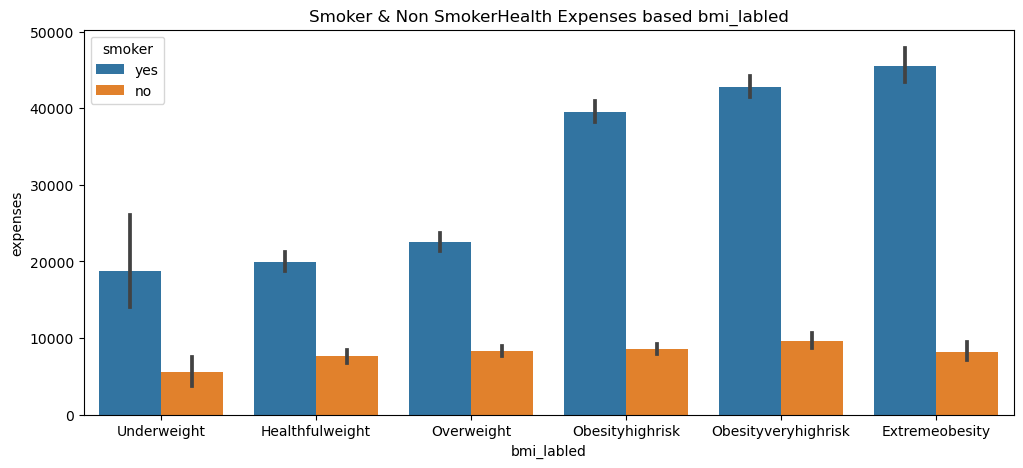

In [48]:
plt.figure(figsize=(12, 5))
sns.barplot(x='bmi_labled', y='expenses', hue='smoker', data=data)
plt.title('Smoker & Non SmokerHealth Expenses based bmi_labled')
plt.show()

EDA Analysis:

* Shape of the data is (1338, 7)
* 3 categorical features & 4 numerical varibales 
* Theres is no null values in the data
* We noticed there is ouliers in "Body Mass Index"
* bmi & childern features are normally distributed 
* Sex feature having two lables "male" & "female" - both are almost same counts in the data
* We noticed 4 regions in the data
* health expenses from "male" category more contributes comapred to "female" 
* Expenses from "smoker" & "non smoker" almost same while looking into total
* "SouthEast" regios is expensesing are more in the data
* Smokers who's bmi is more than  30 are spending more on health expenses
* In all the age , who are smoker are sperning more on health expenses
* In all the regions who are smoking are sperning more on health expenses

## Define: x (independent) & y (dependent)

In [48]:
data.shape

(1338, 8)

In [49]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses',
       'bmi_labled'],
      dtype='object')

In [81]:
x = data[['age', 'bmi','sex', 'children', 'smoker', 'region', 'bmi_labled']]
x.head()

,age,bmi,sex,children,smoker,region,bmi_labled
0,19,27.9,female,0,yes,southwest,Overweight
1,18,33.8,male,1,no,southeast,Obesityhighrisk
2,28,33.0,male,3,no,southeast,Obesityhighrisk
3,33,22.7,male,0,no,northwest,Healthfulweight
4,32,28.9,male,0,no,northwest,Overweight


In [82]:
data["bmi_labled"].unique()

['Overweight', 'Obesityhighrisk', 'Healthfulweight', 'Obesityveryhighrisk', 'Extremeobesity', 'Underweight']
Categories (6, object): ['Underweight' < 'Healthfulweight' < 'Overweight' < 'Obesityhighrisk' < 'Obesityveryhighrisk' < 'Extremeobesity']

In [83]:
data["bmi_labled"].value_counts()

bmi_labled
Overweight             389
Obesityhighrisk        388
Obesityveryhighrisk    227
Healthfulweight        222
Extremeobesity          92
Underweight             20
Name: count, dtype: int64

In [84]:
y = data["expenses"]
y.head()

0    16884.92
1     1725.55
2     4449.46
3    21984.47
4     3866.86
Name: expenses, dtype: float64

## Train Test Split

Conculded Test Size as 30% of the data, which evaluate model performance on unseen data.

In [85]:
## Train Test Split
X_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.3, random_state=42)

In [86]:
X_train.shape

(936, 7)

In [87]:
x_test.shape

(402, 7)

In [88]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 936 entries, 332 to 1126
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   age         936 non-null    int64   
 1   bmi         936 non-null    float64 
 2   sex         936 non-null    object  
 3   children    936 non-null    int64   
 4   smoker      936 non-null    object  
 5   region      936 non-null    object  
 6   bmi_labled  936 non-null    category
dtypes: category(1), float64(1), int64(2), object(3)
memory usage: 52.3+ KB


In [89]:
final_indpendent_columns = X_train.columns.to_list()
final_indpendent_columns

['age', 'bmi', 'sex', 'children', 'smoker', 'region', 'bmi_labled']

In [90]:
final_cat_columns = X_train.select_dtypes(include=["object", "category"]).columns.to_list()
final_cat_columns

['sex', 'smoker', 'region', 'bmi_labled']

In [91]:
final_num_columns = X_train.select_dtypes(exclude=["object", "category"]).columns.to_list()
final_num_columns

['age', 'bmi', 'children']

**Create Preprocessor Pipiline to transform categorical & numerical columns**

In [92]:
categorical_transformer = Pipeline(steps=[
    ('label_encoder', OneHotEncoder())])

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

In [93]:
preprocessor = ColumnTransformer(
    transformers=[
        ('OneHot_Encoder', OneHotEncoder(), final_cat_columns),  # Include all one-hot encoded columns
        ('numeric', StandardScaler(), final_num_columns)])

# Model Training

In [94]:
#Create pipeline for all models
pipelines = {
    'LinearRegression': Pipeline([
        ("preprocessor",preprocessor),
        ('classifier', LinearRegression())]),
    'Ridge Regression': Pipeline([
        ("preprocessor",preprocessor),
        ('classifier', Ridge())]),
    'DecisionTreeRegressor': Pipeline([
        ("preprocessor",preprocessor),
        ('classifier', DecisionTreeRegressor(random_state=0))]),
    'RandomForestRegressor': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', RandomForestRegressor(random_state=0))
    ]),
    'GradientBoostingRegressor': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', GradientBoostingRegressor(random_state=0))
    ]),
     'AdaBoostRegressor': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', AdaBoostRegressor())
    ]),
    'SVR': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', SVR())
    ])
}



In [95]:
#Checkeach model performence
Model_Table =  pd.DataFrame(columns=["Model","MSE" , "MAE", "R2_Score"])
                             
for name , pipe in pipelines.items():
    #print(f"\nTraining and evaluating {name} re:")
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(x_test)
    MSE = mean_squared_error(y_test, y_pred)
    MAE = mean_absolute_error(y_test, y_pred)
    R2_Score = r2_score(y_test, y_pred)
    
    i_model = pd.DataFrame([[name, MSE, MAE, R2_Score]],columns=["Model","MSE", "MAE", "R2_Score" ])
    Model_Table =pd.concat([Model_Table, i_model], ignore_index=True)

Model_Table

,Model,MSE,MAE,R2_Score
0,LinearRegression,3.396933e+07,4268.236745,0.768324
1,Ridge Regression,3.384006e+07,4255.969992,0.769206
2,DecisionTreeRegressor,3.959440e+07,2939.119129,0.729960
3,RandomForestRegressor,2.146669e+07,2592.849760,0.853594
4,GradientBoostingRegressor,1.948191e+07,2471.340066,0.867130
5,AdaBoostRegressor,2.856404e+07,4239.177457,0.805189
6,SVR,1.584478e+08,8244.578746,-0.080638


# Let Choose "GradientBoostingRegressor"

In [96]:
##Pipilone for GradientBoostingRegressor
pipeline_gbr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', GradientBoostingRegressor())
])

In [97]:
params = {
    "model__n_estimators": [50,100,150],
    "model__max_depth": [2,4,6],
    "model__min_samples_split": [2,4, 6],
    "model__min_samples_leaf": [1,2,3],
    "model__learning_rate":[ 0.01,0.1, 0.2],
    "model__loss":[ "squared_error","absolute_error"]
}
#"criterion": ["friedman_mse", "squared_error"],

In [98]:
## Creating GridSearchCV Object Gr
grid_search  = GridSearchCV(pipeline_gbr, param_grid=params, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

In [99]:
#Fit the GridSearchCV on training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('OneHot_Encoder',
                                                                         OneHotEncoder(),
                                                                         ['sex',
                                                                          'smoker',
                                                                          'region',
                                                                          'bmi_labled']),
                                                                        ('numeric',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'bmi',
                                                                          'children'])])),
                                       ('model', GradientBoostingRegressor())]),
             n_jobs=-1,
             param_grid={'model__learning_rate': [0.01, 0.1, 0.2],
                         'model__loss': ['squared_error', 'absolute_error'],
                         'model__max_depth': [2, 4, 6],
                         'model__min_samples_leaf': [1, 2, 3],
                         'model__min_samples_split': [2, 4, 6],
                         'model__n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [100]:
# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'model__learning_rate': 0.1, 'model__loss': 'squared_error', 'model__max_depth': 2, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 100}


In [101]:
##Evalalvating best model on test data
best_model_gbr = grid_search.best_estimator_
best_model_gbr

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('OneHot_Encoder',
                                                  OneHotEncoder(),
                                                  ['sex', 'smoker', 'region',
                                                   'bmi_labled']),
                                                 ('numeric', StandardScaler(),
                                                  ['age', 'bmi',
                                                   'children'])])),
                ('model', GradientBoostingRegressor(max_depth=2))])

In [102]:
##Lets Chcek on score
test_score_gbr = best_model_gbr.score(x_test, y_test)
print("Test Score:",test_score_gbr)

Test Score: 0.870936396540501


In [103]:
y_pred_gbr = best_model_gbr.predict(x_test)
y_pred_gbr[:5]

array([10176.59947425,  6249.95219758, 27507.02585659,  9933.17544918,
       35510.13534202])

In [104]:
print("GradientBoostingRegressor Model:\n")

train_score_gbr = best_model_gbr.score(X_train, y_train)
print("TrainScore:",train_score_gbr)

test_score_gbr = best_model_gbr.score(x_test, y_test)
print("\nTest Score:",test_score_gbr)

mse_gbr = mean_squared_error(y_test, y_pred_gbr)
print("\nMean Squared Error:", mse_gbr)

mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
print("\nMAE :", mae_gbr)

r2score_gbr = r2_score(y_test, y_pred_gbr)
print("\nR2 Score :", r2score_gbr)

GradientBoostingRegressor Model:

TrainScore: 0.8783948377033898

Test Score: 0.870936396540501

Mean Squared Error: 18923861.675651606

MAE : 2442.155172587925

R2 Score : 0.870936396540501


In [105]:
feature_importances_scores = best_model_gbr.named_steps["model"].feature_importances_
feature_importances_scores

array([2.76355268e-05, 1.04716500e-04, 1.48690577e-01, 5.46374654e-01,
       1.36835639e-03, 9.26907271e-05, 0.00000000e+00, 6.81536699e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.53305842e-04,
       1.49637637e-04, 0.00000000e+00, 1.19166712e-01, 1.74427911e-01,
       8.46226589e-03])

In [106]:
#Extarcting transformed feature names of categorical data
transformed_categorical_feature_names = (pipeline_gbr.named_steps["preprocessor"].transformers_[0][1].get_feature_names_out(input_features=final_cat_columns)).tolist()
transformed_categorical_feature_names

['sex_female',
 'sex_male',
 'smoker_no',
 'smoker_yes',
 'region_northeast',
 'region_northwest',
 'region_southeast',
 'region_southwest',
 'bmi_labled_Extremeobesity',
 'bmi_labled_Healthfulweight',
 'bmi_labled_Obesityhighrisk',
 'bmi_labled_Obesityveryhighrisk',
 'bmi_labled_Overweight',
 'bmi_labled_Underweight']

transformed_categorical_feature_names.to

In [107]:
##Final Columns after transformation
all_feature_names = final_num_columns + transformed_categorical_feature_names
all_feature_names

['age',
 'bmi',
 'children',
 'sex_female',
 'sex_male',
 'smoker_no',
 'smoker_yes',
 'region_northeast',
 'region_northwest',
 'region_southeast',
 'region_southwest',
 'bmi_labled_Extremeobesity',
 'bmi_labled_Healthfulweight',
 'bmi_labled_Obesityhighrisk',
 'bmi_labled_Obesityveryhighrisk',
 'bmi_labled_Overweight',
 'bmi_labled_Underweight']

In [108]:
feature_importances_with_scores = dict(zip(all_feature_names, feature_importances_scores))

In [109]:
# Display feature importances with feature names
for feature, rate in feature_importances_with_scores.items():
    print(f"{feature}: {rate}")

age: 2.7635526754157375e-05
bmi: 0.00010471649952868513
children: 0.14869057746752376
sex_female: 0.5463746538821841
sex_male: 0.0013683563938268527
smoker_no: 9.269072713504718e-05
smoker_yes: 0.0
region_northeast: 0.0006815366992677297
region_northwest: 0.0
region_southeast: 0.0
region_southwest: 0.0
bmi_labled_Extremeobesity: 0.0004533058418059426
bmi_labled_Healthfulweight: 0.00014963763686392256
bmi_labled_Obesityhighrisk: 0.0
bmi_labled_Obesityveryhighrisk: 0.1191667123626979
bmi_labled_Overweight: 0.1744279110696961
bmi_labled_Underweight: 0.008462265892715844


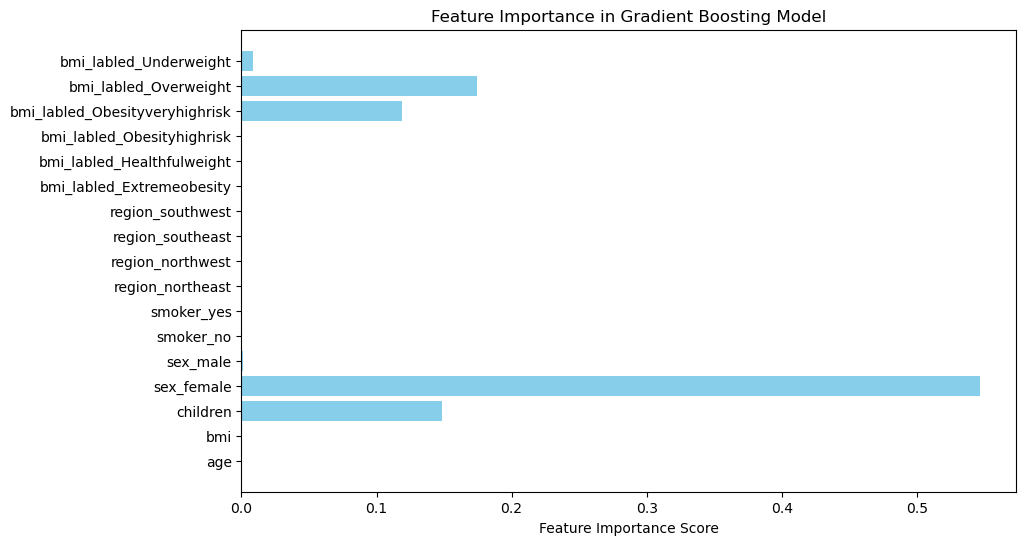

In [110]:
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(all_feature_names, feature_importances_scores, color='skyblue')
plt.xlabel('Feature Importance Score')
plt.title('Feature Importance in Gradient Boosting Model')
plt.show()

**Conclusion:** 

* When we tried multiple regression algorithms , we got "GradientBoostingRegressor" gives the best result among all the models & Model Score is 0.866
* By performed hyperparameter tuning using GridSearchCV to get best parameters
* Best parameters for this model is :
    * learning_rate: 0.1
    * loss : squared_error
    * max_depth: 2
    * min_samples_leaf: 1
    * min_samples_split: 6
    * n_estimators: 100
* Our Best Model Score is:
    * Train: 0.8780. - Model is able to explain approximately 87.8% of the variance in the training data.
    * Test:0.871 - Model is able to generalize and make accurate predictions on new, unseen data is 87.1%.
    * As train & test scores are very near , we can conclude our model is not overfit & also has the potential to genaralize well.
* Importence of features:
    * Age" feature doesn't contribute significantly to the predictions.
    * The "BMI" feature - Overweight, Obesityveryhighrisk, Underweight - are playing a significant role in the model's predictions.
    * "Children" has the good importance, suggesting it plays a significant role in the model's predictions.
    * The "Sex_female" feature has a higher importance compared to "Sex_male," indicating that gender, especially female, is considered important in the model.
    * Among the regions, "Region_southeast" has the highest importance, indicating it has a stronger influence on predictions compared to the other regions.